In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.metrics import mean_squared_error

# Generate Dataset 1
np.random.seed(45)
num_samples = 40

# Generate data for Dataset 1
x1_dataset1 = np.random.uniform(-20, 20, num_samples)
f_x_dataset1 = 100 * x1_dataset1 + 1
eps_dataset1 = np.random.randn(num_samples)
y_dataset1 = f_x_dataset1 + eps_dataset1

# Generate Dataset 2
np.random.seed(45)

# Generate data for Dataset 2
x1_dataset2 = np.random.uniform(-1, 1, num_samples)
f_x_dataset2 = 3 * x1_dataset2 + 4
eps_dataset2 = np.random.randn(num_samples)
y_dataset2 = f_x_dataset2 + eps_dataset2


In [2]:
# Full-batch gradient descent function
def full_batch_gradient_descent(x, y, learning_rate, num_epochs, epsilon):
    w = np.zeros(2)
    weights = [w.copy()]  # Store weights for contour plot
    losses = []

    for epoch in range(num_epochs):
        y_pred = np.dot(x, w)
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        gradient = np.array([
            np.mean(2 * (y_pred - y)),
            np.mean(2 * np.dot(x.T, (y_pred - y)))
        ])
        w -= learning_rate * gradient

        weights.append(w.copy())

        if epoch > 0 and abs(losses[-1] - losses[-2]) < epsilon:
            break

    return w, losses, weights


# Stochastic gradient descent function
def stochastic_gradient_descent(x, y, learning_rate, num_epochs, epsilon):
    w = np.zeros(2)
    weights = [w.copy()]  # Store weights for contour plot
    losses = []

    for epoch in range(num_epochs):
        for i in range(len(x)):
            y_pred = np.dot(x[i], w)
            loss = (y_pred - y[i]) ** 2
            losses.append(loss)

            gradient = np.array([
                2 * (y_pred - y[i]) * 1,           # Gradient with respect to the bias term
                2 * (y_pred - y[i]) * x[i][1]      # Gradient with respect to the weight
            ])
            w -= learning_rate * gradient

            weights.append(w.copy())

            if epoch > 0 and abs(losses[-1] - losses[-2]) < epsilon:
                break

    return w, losses, weights

num_epochs = 1000
epsilon = 1e-3
learning_rate = 1e-4

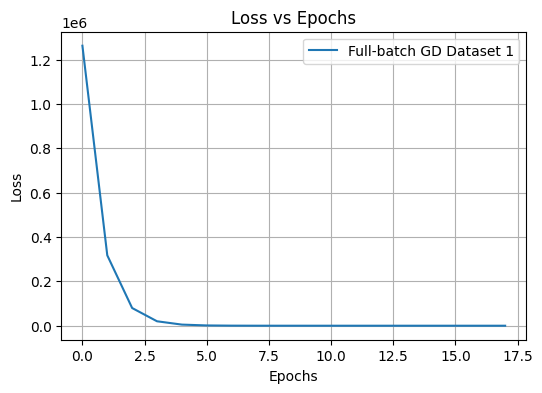

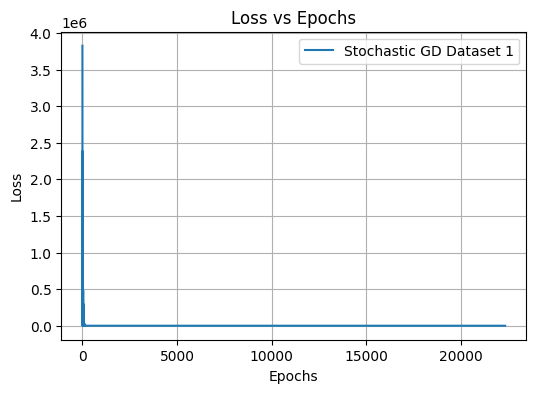

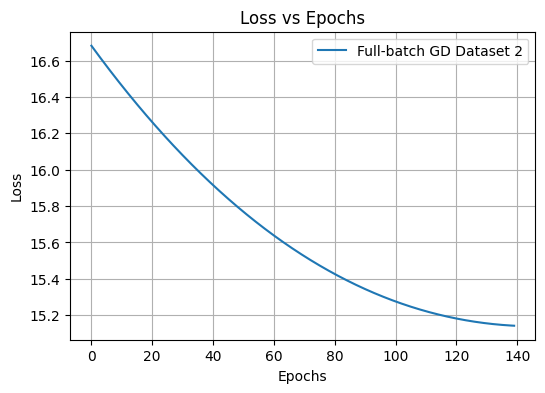

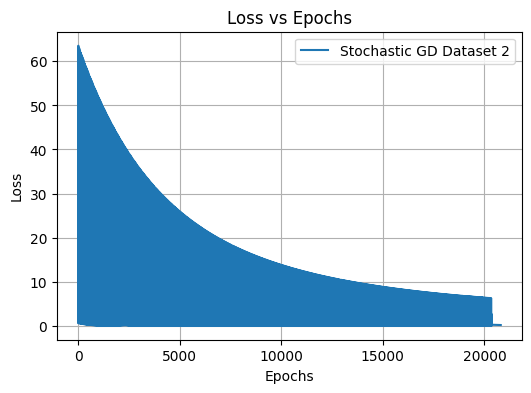

In [3]:
# Run full-batch gradient descent on Dataset 1
w_full_batch_dataset1, losses_full_batch_dataset1, weights_full_batch_dataset1 = full_batch_gradient_descent(np.vstack((np.ones(num_samples), x1_dataset1)).T, y_dataset1, learning_rate, num_epochs, epsilon)

# Run full-batch gradient descent on Dataset 2
w_full_batch_dataset2, losses_full_batch_dataset2, weights_full_batch_dataset2 = full_batch_gradient_descent(np.vstack((np.ones(num_samples), x1_dataset2)).T, y_dataset2, learning_rate, num_epochs, epsilon)

# Run stochastic gradient descent on Dataset 1
w_stochastic_dataset1, losses_stochastic_dataset1, weights_stochastic_dataset1 = stochastic_gradient_descent(np.vstack((np.ones(num_samples), x1_dataset1)).T, y_dataset1, learning_rate, num_epochs, epsilon)

# Run stochastic gradient descent on Dataset 2
w_stochastic_dataset2, losses_stochastic_dataset2, weights_stochastic_dataset2 = stochastic_gradient_descent(np.vstack((np.ones(num_samples), x1_dataset2)).T, y_dataset2, learning_rate, num_epochs, epsilon)


# Plot Loss vs Epochs for full-batch gradient descent on Dataset 1
plt.figure(figsize=(6, 4))
plt.plot(range(len(losses_full_batch_dataset1)), losses_full_batch_dataset1, label='Full-batch GD Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Plot Loss vs Epochs for stochastic gradient descent on Dataset 1
plt.figure(figsize=(6, 4))
plt.plot(range(len(losses_stochastic_dataset1)), losses_stochastic_dataset1, label='Stochastic GD Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

# Plot Loss vs Epochs for full-batch gradient descent on Dataset 2
plt.figure(figsize=(6, 4))
plt.plot(range(len(losses_full_batch_dataset2)), losses_full_batch_dataset2, label='Full-batch GD Dataset 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss vs Epochs for stochastic gradient descent on Dataset 2
plt.figure(figsize=(6, 4))
plt.plot(range(len(losses_stochastic_dataset2)), losses_stochastic_dataset2, label='Stochastic GD Dataset 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

In [4]:
#Print the number of epochs required to converge on Dataset 1

#Using full-batch gradient descent
print("Number of epochs required to converge for Dataset 1 using full-batch gradient descent: ", len(losses_full_batch_dataset1))

#Using stochastic gradient descent
print("Number of epochs required to converge for Dataset 1 using stochastic gradient descent: ", len(losses_stochastic_dataset1))

#Print the number of epochs required to converge on Dataset 2

#Using full-batch gradient descent
print("Number of epochs required to converge for Dataset 2 using full-batch gradient descent: ", len(losses_full_batch_dataset2))

#Using stochastic gradient descent
print("Number of epochs required to converge for Dataset 2 using stochastic gradient descent: ", len(losses_stochastic_dataset2))

Number of epochs required to converge for Dataset 1 using full-batch gradient descent:  18
Number of epochs required to converge for Dataset 1 using stochastic gradient descent:  22349
Number of epochs required to converge for Dataset 2 using full-batch gradient descent:  140
Number of epochs required to converge for Dataset 2 using stochastic gradient descent:  20803


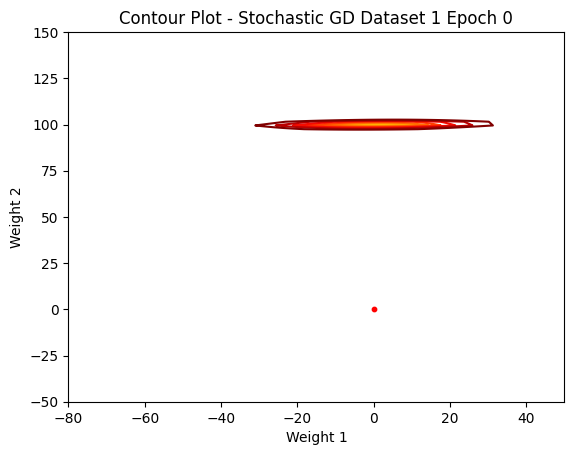

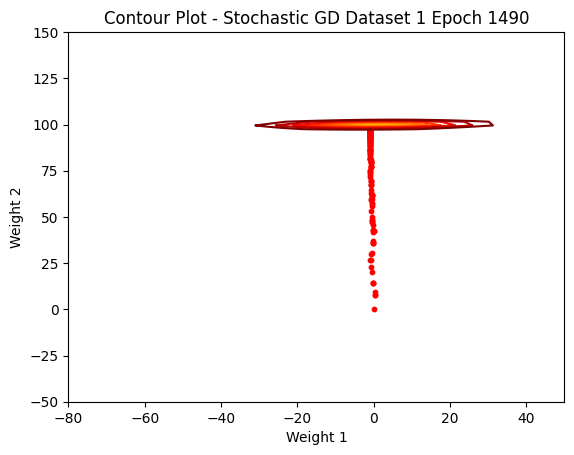

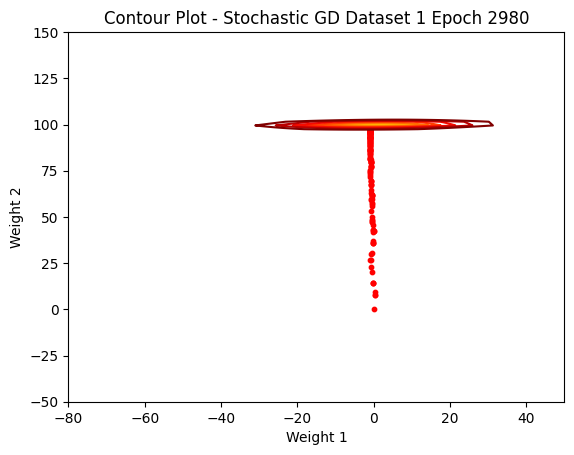

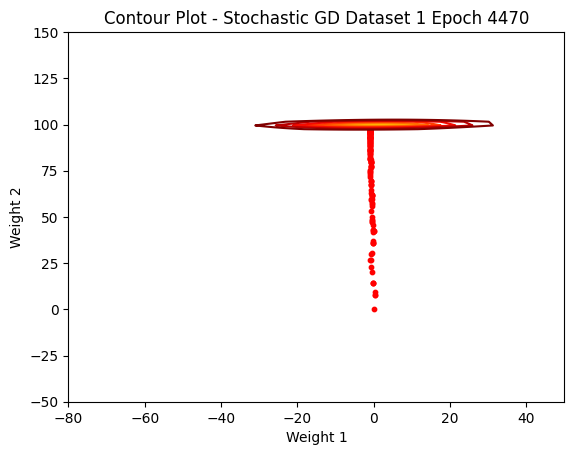

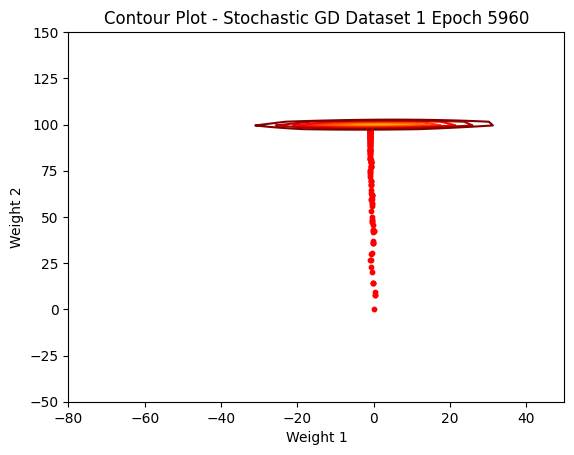

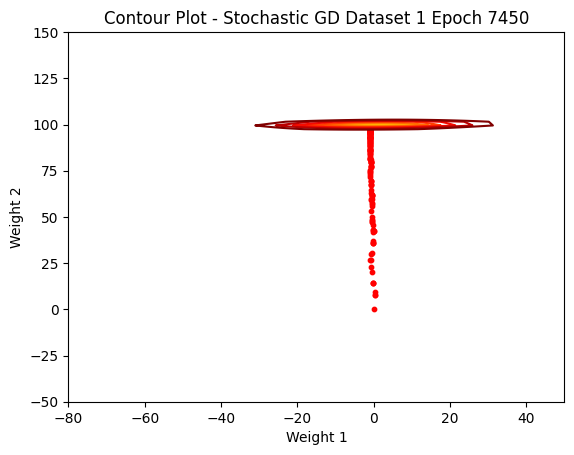

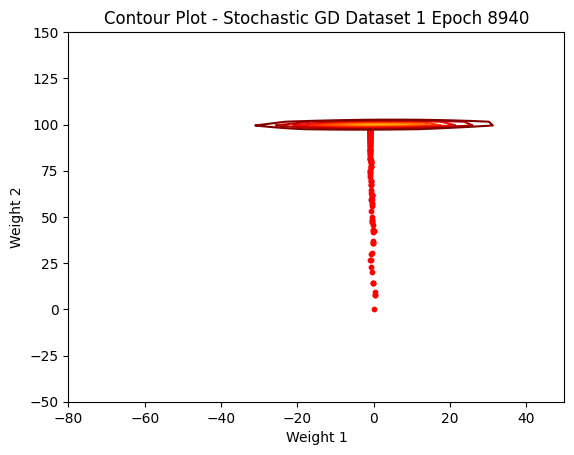

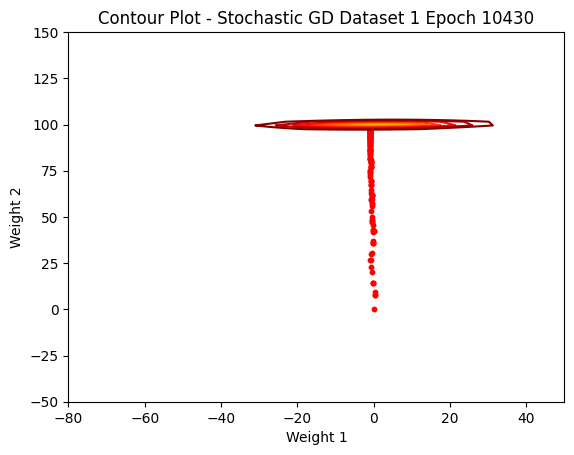

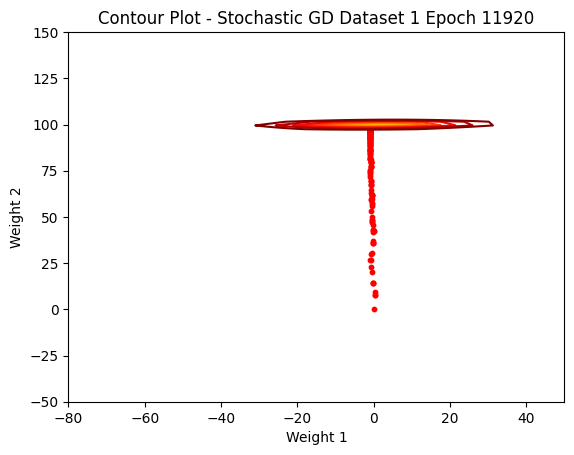

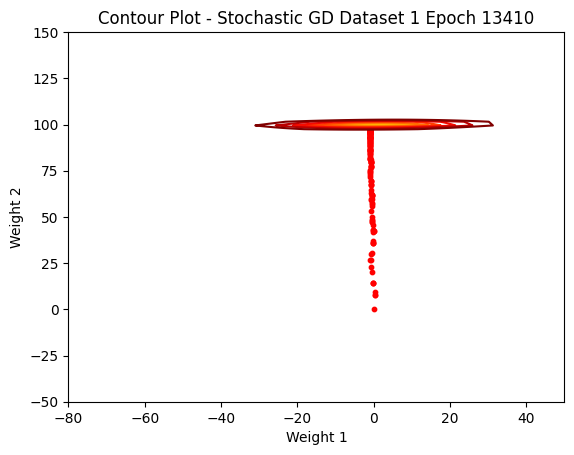

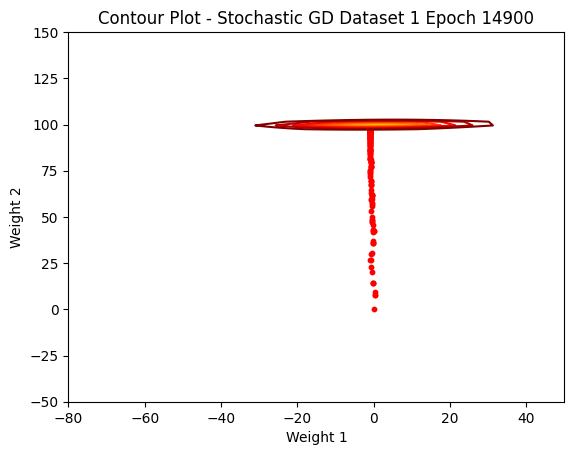

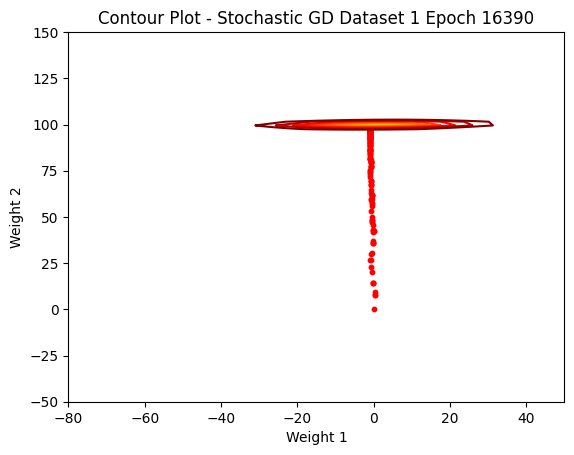

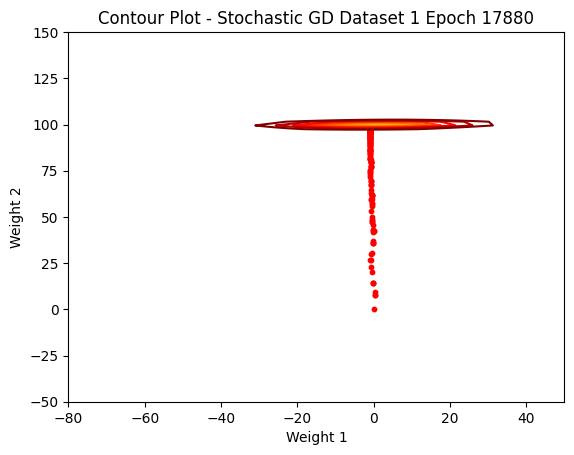

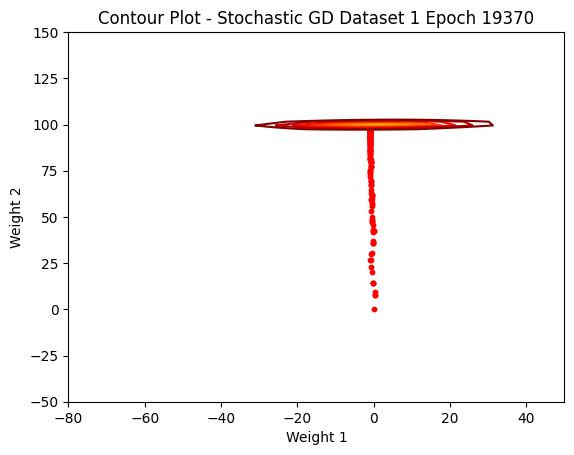

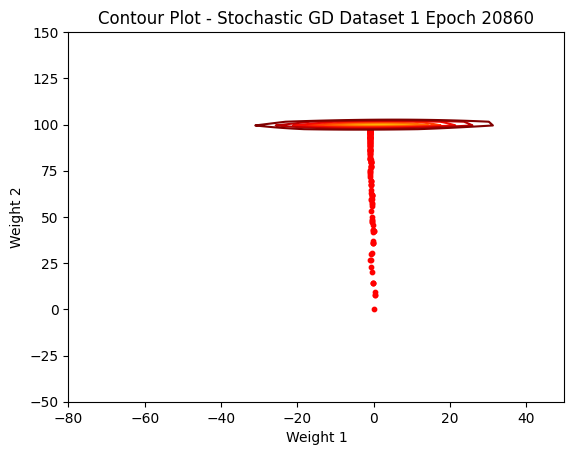

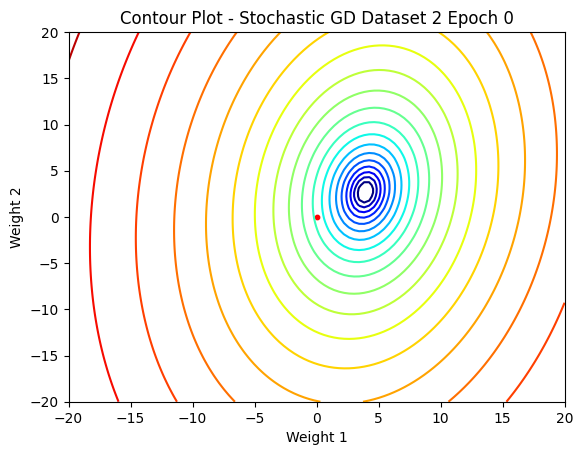

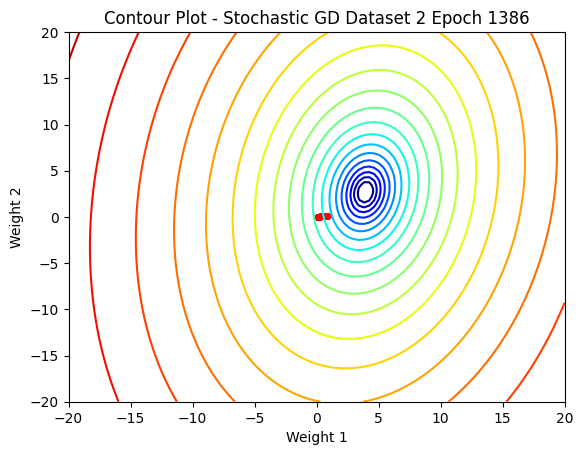

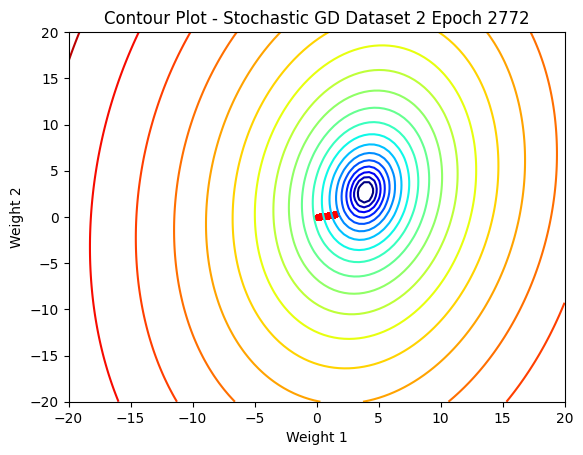

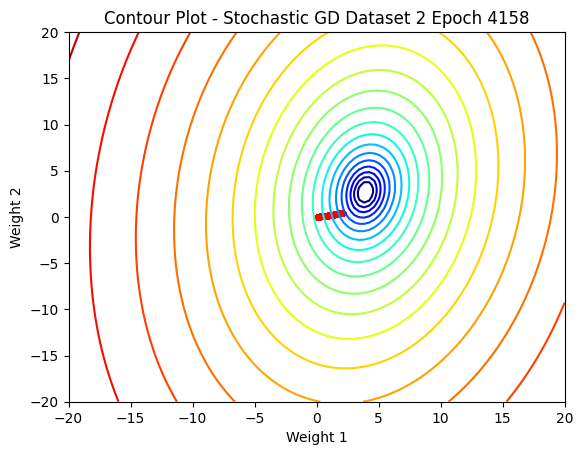

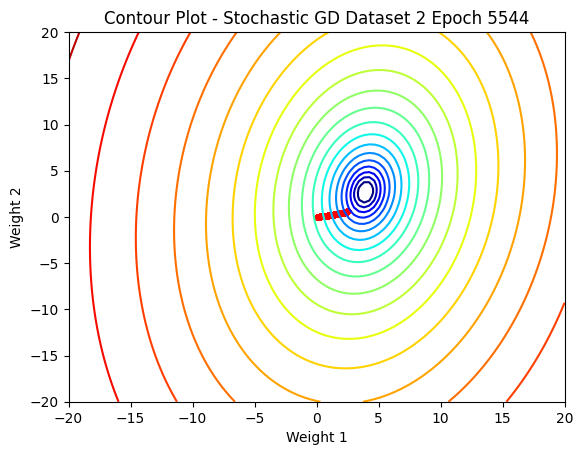

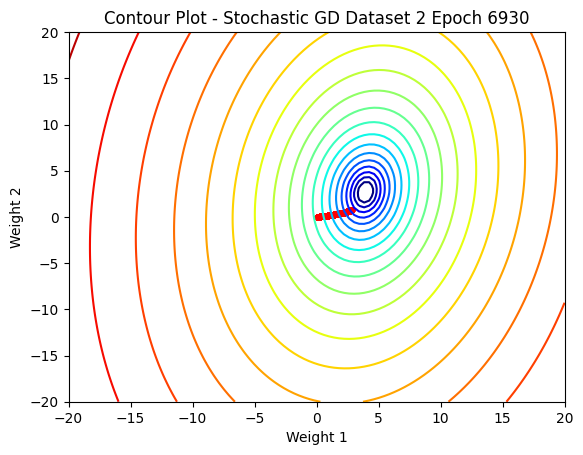

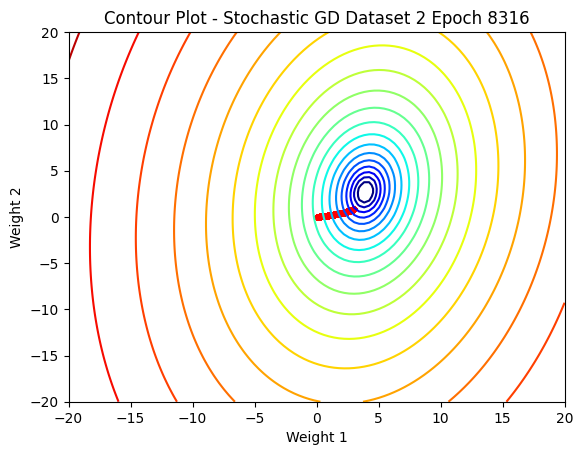

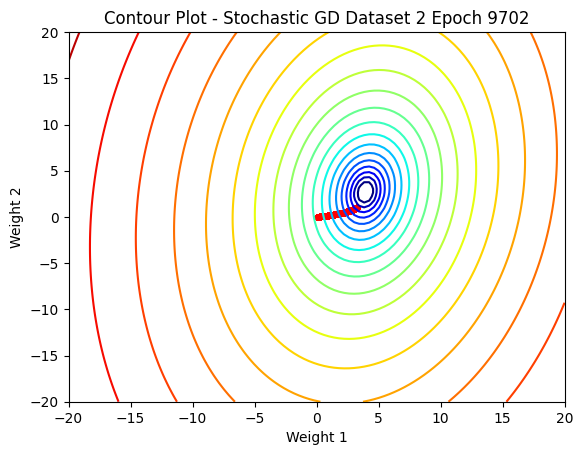

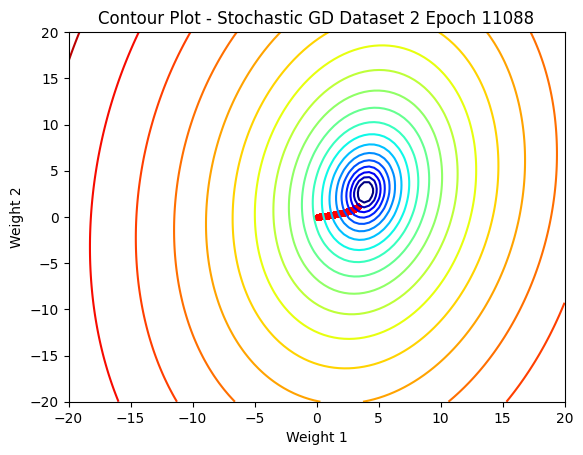

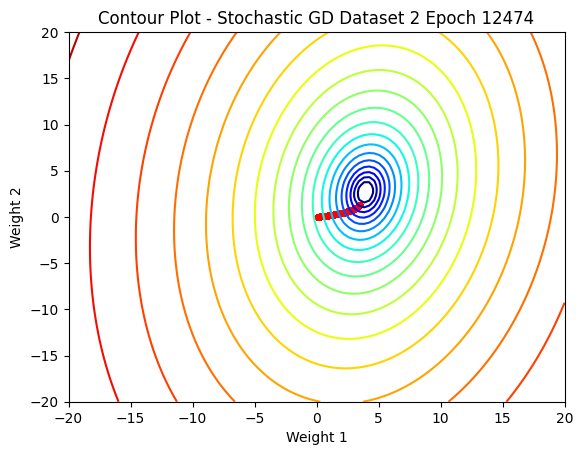

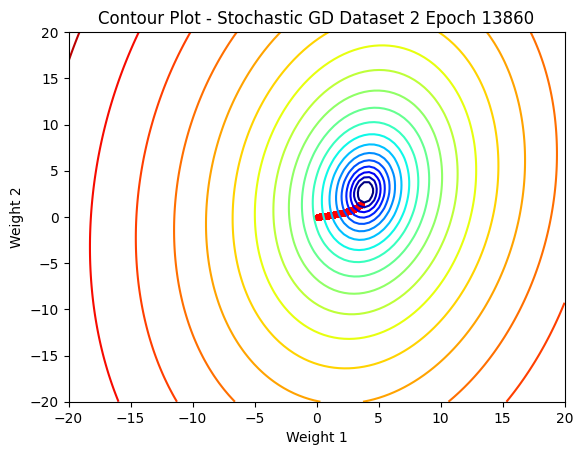

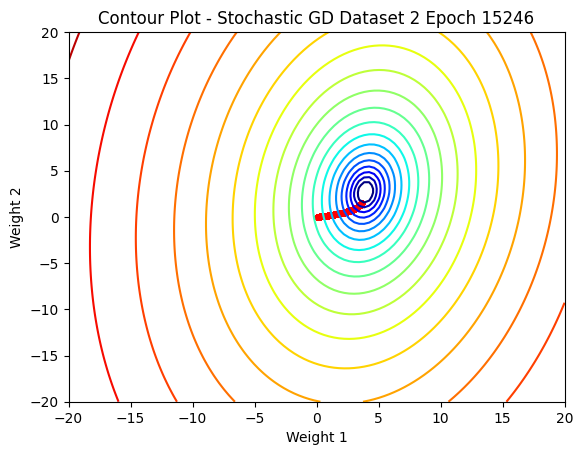

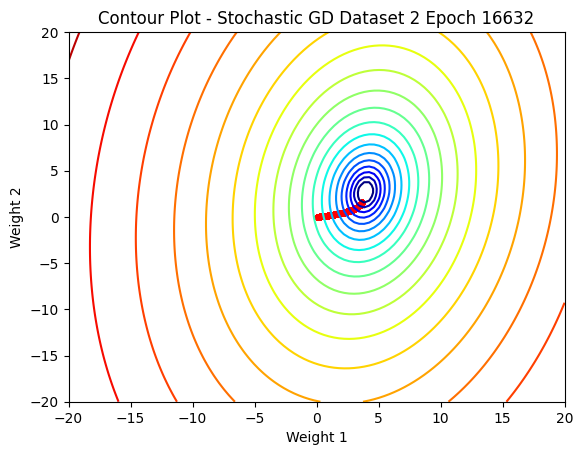

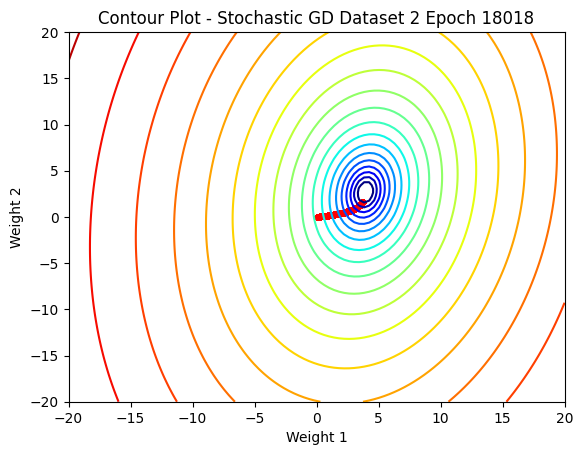

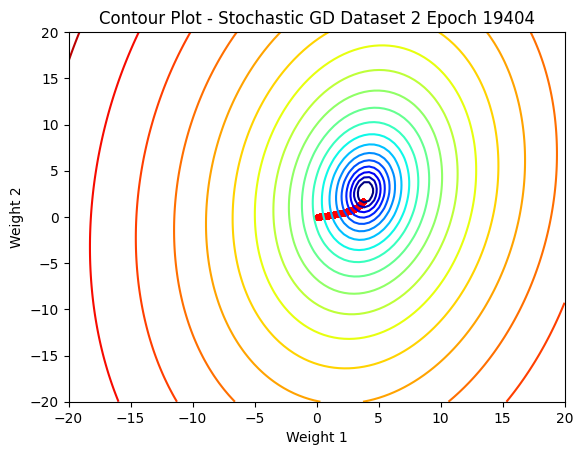

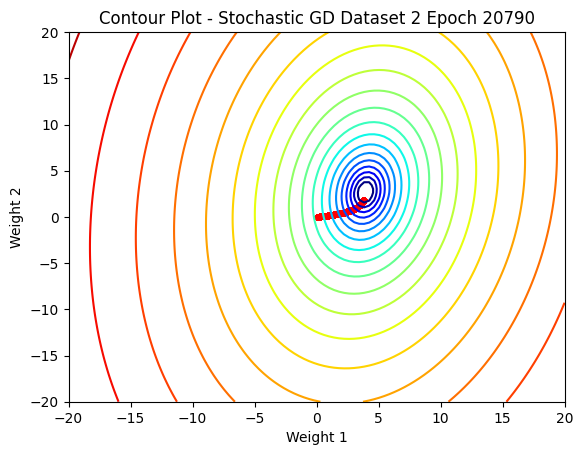

In [5]:
from matplotlib.colors import LogNorm


# Define a function to create contour plots for the weights 
def plot_contour(x, y, losses, weights, title):
    X, Y = np.meshgrid(np.linspace(-80, 50, 100), np.linspace(-50, 150, 100))
    Z = np.zeros_like(X)

    for i in range(len(X)):
        for j in range(len(Y)):
            w = np.array([X[i, j], Y[i, j]])
            y_pred = np.dot(x, w)
            Z[i, j] = np.mean((y_pred - y) ** 2)

    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=np.logspace(0, 3, 20), norm=LogNorm(), cmap=plt.cm.jet)
    ax.scatter([w[0] for w in weights], [w[1] for w in weights], color='red', s=10)
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_title(title)
    plt.show()

# Define a function to create contour plots for the weights 
def plot_contour2(x, y, losses, weights, title):
    X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
    Z = np.zeros_like(X)

    for i in range(len(X)):
        for j in range(len(Y)):
            w = np.array([X[i, j], Y[i, j]])
            y_pred = np.dot(x, w)
            Z[i, j] = np.mean((y_pred - y) ** 2)

    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=np.logspace(0, 3, 20), norm=LogNorm(), cmap=plt.cm.jet)
    ax.scatter([w[0] for w in weights], [w[1] for w in weights], color='red', s=10)
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_title(title)
    plt.show()
    
# Create contour plots for stochastic gradient descent on Dataset 1
for i in range(0, len(weights_stochastic_dataset1), len(weights_stochastic_dataset1) // 15):
    plot_contour(np.vstack((np.ones(num_samples), x1_dataset1)).T,
                  y_dataset1, losses_stochastic_dataset1, weights_stochastic_dataset1[:i+1],
                  'Contour Plot - Stochastic GD Dataset 1 Epoch {}'.format(i))

# Create contour plots for stochastic gradient descent on Dataset 2
for i in range(0, len(weights_stochastic_dataset2), len(weights_stochastic_dataset2) // 15):
    plot_contour2(np.vstack((np.ones(num_samples), x1_dataset2)).T,
                  y_dataset2, losses_stochastic_dataset2,
                  weights_stochastic_dataset2[:i+1],
                  'Contour Plot - Stochastic GD Dataset 2 Epoch {}'.format(i))